## Tasks: Arbitrary boundary shapes

Consider a circle with radius $r=1$. Set the potential on the circle to be $V_0$ and put a point charge at the center. Using the generalization to the arbitrary boundary shapes to find the potential inside the circle. 

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -2. -2. ... -2. -2.  0.]
 [ 0. -2. -2. ... -2. -2.  0.]
 ...
 [ 0. -2. -2. ... -2. -2.  0.]
 [ 0. -2. -2. ... -2. -2.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


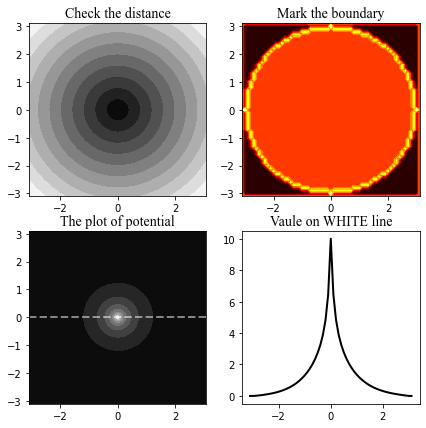

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
counter = 0

fig, p = plt.subplots(ncols=2, nrows=2, figsize=(7, 7))

fineness = 0.1
iteration = 200
levels = 10
R = 3
RV = 0

start = -3.1
end   = +3.1
total = (end - start)/fineness + 1

x_total = total
y_total = total

x = np.linspace(start, end, int(x_total))
y = np.linspace(start, end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X) + RV
V_distance = np.zeros_like(X)
V_marker = np.zeros_like(X)
V_next = np.zeros_like(X)

center_x = int((total-1)/2)
center_y = int((total-1)/2)

#建立邊常為2的圓

for i in range(0, int(x_total)):
    for j in range(0, int(y_total)):
        V_distance[j, i] = (((j-center_y)*fineness)**2 + ((i-center_x)*fineness)**2)**0.5

for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_distance[j, i] > R): V_marker[j, i] = -1
        elif(V_distance[j, i] == R): V_marker[j, i] = 0
        else: V_marker[j, i] = +1
            
for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_marker[j, i] == -1 and (V_marker[j, i+1] != 1) and (V_marker[j, i-1] != 1) and (V_marker[j+1, i] != 1) and (V_marker[j-1, i] != 1)): V_marker[j, i] = -2
        elif(V_marker[j, i] == 1 and (V_marker[j, i+1] != -1) and (V_marker[j, i-1] != -1) and (V_marker[j+1, i] != -1) and (V_marker[j-1, i] != -1)): V_marker[j, i] = 0
        elif(V_distance[j, i] == R): V_marker[j, i] = 2
        else: V_marker[j, i] = V_marker[j, i]
        
p[0,0].contourf(X, Y, V_distance, levels, cmap=cm.gray)
p[0,1].contourf(X, Y, V_marker, levels, cmap=cm.hot)

print(V_marker)

sign = 0
RVxen = 0
Vxen = 0
RVxen = 0
Vxen = 0

counter = 0

V_a = np.zeros_like(X)
V_b = np.zeros_like(X)
V[center_y, center_x] = 10

for s in range(1, iteration):
    for j in range(1, int(y_total)-1):
        for i in range(1, int(x_total)-1):
            if(V_marker[j, i] == 1):
                if(V_marker[j, i-1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = -1
                    RVxen = 1
                    Vxen = 0
                elif(V_marker[j, i+1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = +1
                    RVxen = 1
                    Vxen = 0
                else:
                    a = 1
                    sign = -1
                    RVxen = 0
                    Vxen = 1
                
                if(V_marker[j-1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = -1
                    RVyen = 1
                    Vyen = 0
                elif(V_marker[j+1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = +1
                    RVyen = 1
                    Vyen = 0
                else:
                    b = 1
                    sign = -1
                    RVyen = 0
                    Vyen = 1
                V_a[j, i] = a
                V_b[j, i] = b
                V_next[j, i] = ((a*b)/(a+b))*((V[j, i+sign]/(1+a))+((RV*RVxen+V[j, i-sign]*Vxen)/(a*(1+a)))+(V[j+sign, i]/(1+b))+((RV*RVyen+V[j-sign, i]*Vyen)/(b*(1+b))))

            elif(V_marker[j, i] == 2 or V_marker[j, i] == -2 or V_marker[j, i] == -1): V_next[j, i] = RV
            elif(V_marker[j, i] == 0): V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            else: V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            
            V = V_next
            V[center_y, center_x] = 10

V [0,:] = RV
V [:,0] = RV
V [int(y_total-1),:] = RV
V [:,int(x_total-1)] = RV

p[1,0].contourf(X, Y, V, levels, cmap=cm.gray) 
p[1,1].plot(x, V[center_y,:],'k', lw = 2) 

p[0,0].set_title("Check the distance", fontsize=14, fontname='Times New Roman')
p[0,1].set_title("Mark the boundary", fontsize=14, fontname='Times New Roman')
p[1,0].set_title("The plot of potential", fontsize=14, fontname='Times New Roman')
p[1,1].set_title("Vaule on WHITE line", fontsize=14, fontname='Times New Roman')

p[1,0].plot(x, Y[center_y,:],'--w', lw = 2, alpha = .5)
plt.savefig("A-1.pdf")

consider a boundary cross between two data points on $x$-axis, the right point is iside the boundary, and the left one is outside the boundary. We can write

$$
    \frac{dV}{dx} \approx \frac{V(x+h)-V(x-ah)}{h+ah}
$$

where $a$ is a number that express where the boundary passes through two points. Let the inside point is located at 0, the outside one is located at 1, if the boundary cross between two data points at $0.7$, then $h = 0.7$; $h$ is the actual distance between two data points. We have to consider the directioin when iterating, the discussion below assume the program will calculate them from outside the boundary to inside. For second derivative

$$
    \frac{d^2 V}{dx^2} \approx \frac{2}{h^2} \left[\frac{V(x+h, y)}{1+a} + \frac{V(x-ah, y)}{a(1+a)} - \frac{V(x, y)}{a} \right]
$$

also consider the situation in $y$-axis

$$
    \frac{dV}{dy} \approx \frac{V(y+h)-V(y-bh)}{h+bh}
$$

$$
    \frac{d^2 V}{dy^2} \approx \frac{2}{h^2} \left[\frac{V(x, y+h)}{1+b} + \frac{V(x, y-bh)}{b(1+b)} - \frac{V(x, y)}{b} \right]
$$

which follows the Laplace's equation

$$
    \nabla^2 V = \frac{2}{h^2} \left[\frac{V(x+h, y)}{1+a} + \frac{V(x, y+h)}{1+b} + \frac{V(x-ah, y)}{a(1+a)} + \frac{V(x, y-bh)}{b(1+b)} - \frac{V(x, y)}{a} - \frac{V(x, y)}{b} \right] = 0
$$

$$
    \left[\frac{V(x+h, y)}{1+a} + \frac{V(x, y+h)}{1+b} + \frac{V(x-ah, y)}{a(1+a)} + \frac{V(x, y-bh)}{b(1+b)} \right] = \frac{V(x, y)}{a} - \frac{V(x, y)}{b}
$$

$$
    \frac{(a\times b)}{(a + b)} \left[\frac{V(x+h, y)}{1+a} + \frac{V(x-ah, y)}{a(1+a)} + \frac{V(x, y+h)}{1+b} + \frac{V(x, y-bh)}{b(1+b)} \right] = V(x, y)
$$

If calculate them from inside the boundary to outside, the equation becomes

$$
    \frac{(a\times b)}{(a + b)} \left[\frac{V(x-h, y)}{1+a} + \frac{V(x+ah, y)}{a(1+a)} + \frac{V(x, y-h)}{1+b} + \frac{V(x, y+bh)}{b(1+b)} \right] = V(x, y)
$$

C:\Users\dppss\AppData\Local\Temp/ipykernel_18436/469176506.py:48: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(pvj, orientation="horizontal", pad=0.15)


61.0


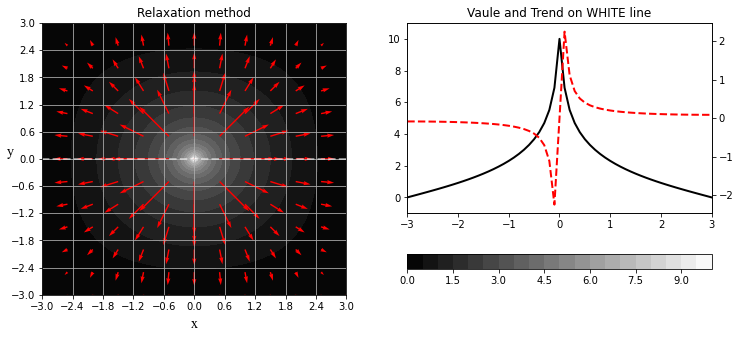

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

iteration = 2000
fineness = 0.1
levels = 20

x_start = -3
x_end   = 3
x_total = (x_end - x_start)/fineness + 1

y_start = -3
y_end   = 3

y_total = x_total
center_x = int((x_total-1)/2)
center_y = int((y_total-1)/2)
center = int((x_total-1)/2)

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCL, BCR, BCU, BCD = (0, 0, 0, 0)
V[:, 0] = BCL
V[:, int(y_total)-1] = BCR
V[0, :] = BCD
V[int(x_total)-1, :] = BCU

V[center_y, center_x] = 10

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            V[center_y, center_x] = 10
            
Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[0].contourf(X, Y, V, levels, cmap=cm.gray)
fig.colorbar(pvj, orientation="horizontal", pad=0.15)
p[0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[0].set_xticks(np.linspace(x_start, x_end, 11))
p[0].set_yticks(np.linspace(y_start, y_end, 11))
p[0].grid()
p[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0].set_title("Relaxation method")

p[1].plot(x, V[center,:],'k', lw = 2)
ax2=p[1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1].set_xlim([x_start, x_end])
p[1].set_ylim([-1, 11])
p[1].set_title("Vaule and Trend on WHITE line")
print(x_total)

C:\Users\dppss\AppData\Local\Temp/ipykernel_18436/2345093828.py:119: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(pvj, orientation="horizontal", pad=0.15)


61.0


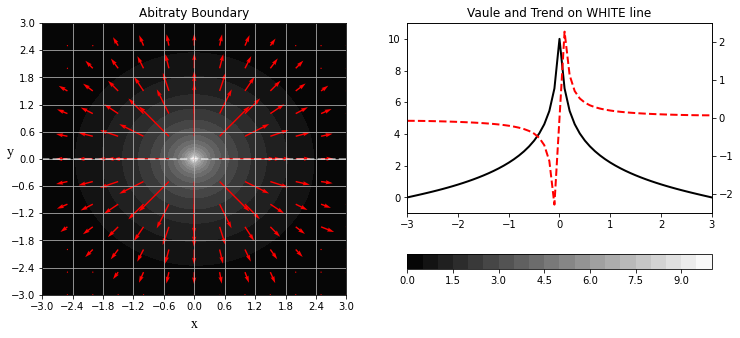

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
counter = 0

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

fineness = 0.1
iteration = 2000
levels = 20
R = 3
RV = 0

x_start = -3
x_end   = 3
y_start = -3
y_end   = 3

start = -3
end   = +3
total = (end - start)/fineness + 1

x_total = total
y_total = total

x = np.linspace(start, end, int(x_total))
y = np.linspace(start, end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X) + RV
V_distance = np.zeros_like(X)
V_marker = np.zeros_like(X)
V_next = np.zeros_like(X)

center_x = int((total-1)/2)
center_y = int((total-1)/2)
center = int((total-1)/2)


for i in range(0, int(x_total)):
    for j in range(0, int(y_total)):
        V_distance[j, i] = (((j-center_y)*fineness)**2 + ((i-center_x)*fineness)**2)**0.5

for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_distance[j, i] > R): V_marker[j, i] = -1
        elif(V_distance[j, i] == R): V_marker[j, i] = 0
        else: V_marker[j, i] = +1
            
for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_marker[j, i] == -1 and (V_marker[j, i+1] != 1) and (V_marker[j, i-1] != 1) and (V_marker[j+1, i] != 1) and (V_marker[j-1, i] != 1)): V_marker[j, i] = -2
        elif(V_marker[j, i] == 1 and (V_marker[j, i+1] != -1) and (V_marker[j, i-1] != -1) and (V_marker[j+1, i] != -1) and (V_marker[j-1, i] != -1)): V_marker[j, i] = 0
        elif(V_distance[j, i] == R): V_marker[j, i] = 2
        else: V_marker[j, i] = V_marker[j, i]

sign = 0
RVxen = 0
Vxen = 0
RVxen = 0
Vxen = 0
counter = 0

V[center_y, center_x] = 10

for s in range(1, iteration):
    for j in range(1, int(y_total)-1):
        for i in range(1, int(x_total)-1):
            if(V_marker[j, i] == 1):
                if(V_marker[j, i-1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = -1
                    RVxen = 1
                    Vxen = 0
                elif(V_marker[j, i+1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = +1
                    RVxen = 1
                    Vxen = 0
                else:
                    a = 1
                    sign = -1
                    RVxen = 0
                    Vxen = 1
                
                if(V_marker[j-1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = -1
                    RVyen = 1
                    Vyen = 0
                elif(V_marker[j+1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = +1
                    RVyen = 1
                    Vyen = 0
                else:
                    b = 1
                    sign = -1
                    RVyen = 0
                    Vyen = 1
                V_next[j, i] = ((a*b)/(a+b))*((V[j, i+sign]/(1+a))+((RV*RVxen+V[j, i-sign]*Vxen)/(a*(1+a)))+(V[j+sign, i]/(1+b))+((RV*RVyen+V[j-sign, i]*Vyen)/(b*(1+b))))

            elif(V_marker[j, i] == 2 or V_marker[j, i] == -2 or V_marker[j, i] == -1): V_next[j, i] = RV
            elif(V_marker[j, i] == 0): V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            else: V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            
            V = V_next
            V[center_y, center_x] = 10

V [0,:] = RV
V [:,0] = RV
V [int(y_total-1),:] = RV
V [:,int(x_total-1)] = RV

Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[0].contourf(X, Y, V, levels, cmap=cm.gray)
fig.colorbar(pvj, orientation="horizontal", pad=0.15)
p[0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[0].set_xticks(np.linspace(x_start, x_end, 11))
p[0].set_yticks(np.linspace(y_start, y_end, 11))
p[0].set_xlim([x_start, x_end])
p[0].set_ylim([y_start, y_end])
p[0].grid()
p[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0].set_title("Abitraty Boundary")

p[1].plot(x, V[center,:],'k', lw = 2)
ax2=p[1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1].set_xlim([x_start, x_end])
p[1].set_ylim([-1, 11])
p[1].set_title("Vaule and Trend on WHITE line")
print(x_total)

61.0
61.0


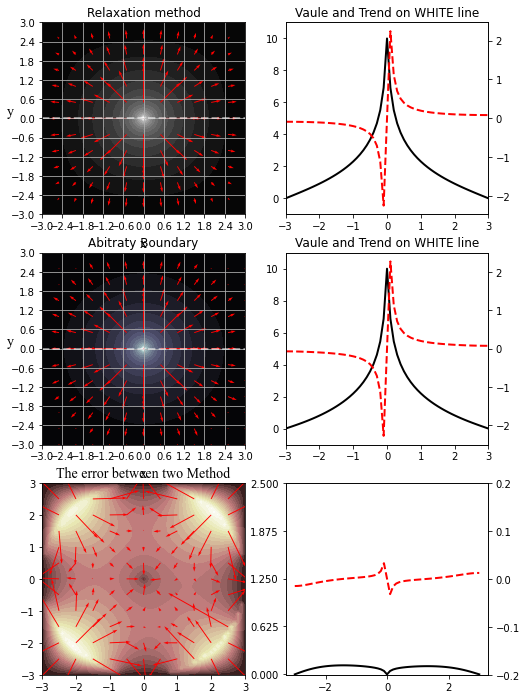

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=3, figsize=(8, 12))

iteration = 5000
fineness = 0.1
levels = 20

x_start = -3
x_end   = 3
x_total = (x_end - x_start)/fineness + 1

y_start = -3
y_end   = 3

y_total = x_total
center_x = int((x_total-1)/2)
center_y = int((y_total-1)/2)
center = int((x_total-1)/2)

xR = np.linspace(x_start, x_end, int(x_total))
yR = np.linspace(y_start, y_end, int(y_total))

XR, YR = np.meshgrid(xR, yR, indexing = 'xy')
VR = np.zeros_like(XR)

# 邊界條件
BCL, BCR, BCU, BCD = (0, 0, 0, 0)
VR[:, 0] = BCL
VR[:, int(y_total)-1] = BCR
VR[0, :] = BCD
VR[int(x_total)-1, :] = BCU

VR[center_y, center_x] = 10

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            VR[j, i] = (VR[j-1, i] + VR[j+1, i] + VR[j, i-1] + VR[j, i+1])/4
            VR[center_y, center_x] = 10
            
EyR, ExR = np.gradient(-VR)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[0, 0].contourf(XR, YR, VR, levels, cmap=cm.gray)
p[0, 0].quiver(XR[skip], YR[skip], ExR[skip], EyR[skip], color = 'r', scale=2)
p[0, 0].plot(xR, YR[center,:],'--w', lw = 2, alpha = .5)
p[0, 0].set_xticks(np.linspace(x_start, x_end, 11))
p[0, 0].set_yticks(np.linspace(y_start, y_end, 11))
p[0, 0].grid()
p[0, 0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0, 0].set_title("Relaxation method")

p[0, 1].plot(xR, VR[center,:],'k', lw = 2)
ax2=p[0, 1].twinx()
ax2.plot(xR, ExR[center,:],'--r', lw = 2)
p[0, 1].set_xlim([x_start, x_end])
p[0, 1].set_ylim([-1, 11])
p[0, 1].set_title("Vaule and Trend on WHITE line")
print(x_total)

##############################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
counter = 0

R = 3
RV = 0

x_start = -3
x_end   = 3
y_start = -3
y_end   = 3

start = -3
end   = +3
total = (end - start)/fineness + 1

x_total = total
y_total = total

x = np.linspace(start, end, int(x_total))
y = np.linspace(start, end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X) + RV
V_distance = np.zeros_like(X)
V_marker = np.zeros_like(X)
V_next = np.zeros_like(X)

center_x = int((total-1)/2)
center_y = int((total-1)/2)
center = int((total-1)/2)


for i in range(0, int(x_total)):
    for j in range(0, int(y_total)):
        V_distance[j, i] = (((j-center_y)*fineness)**2 + ((i-center_x)*fineness)**2)**0.5

for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_distance[j, i] > R): V_marker[j, i] = -1
        elif(V_distance[j, i] == R): V_marker[j, i] = 0
        else: V_marker[j, i] = +1
            
for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_marker[j, i] == -1 and (V_marker[j, i+1] != 1) and (V_marker[j, i-1] != 1) and (V_marker[j+1, i] != 1) and (V_marker[j-1, i] != 1)): V_marker[j, i] = -2
        elif(V_marker[j, i] == 1 and (V_marker[j, i+1] != -1) and (V_marker[j, i-1] != -1) and (V_marker[j+1, i] != -1) and (V_marker[j-1, i] != -1)): V_marker[j, i] = 0
        elif(V_distance[j, i] == R): V_marker[j, i] = 2
        else: V_marker[j, i] = V_marker[j, i]

sign = 0
RVxen = 0
Vxen = 0
RVxen = 0
Vxen = 0
counter = 0

V[center_y, center_x] = 10

for s in range(1, iteration):
    for j in range(1, int(y_total)-1):
        for i in range(1, int(x_total)-1):
            if(V_marker[j, i] == 1):
                if(V_marker[j, i-1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = -1
                    RVxen = 1
                    Vxen = 0
                elif(V_marker[j, i+1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = +1
                    RVxen = 1
                    Vxen = 0
                else:
                    a = 1
                    sign = -1
                    RVxen = 0
                    Vxen = 1
                
                if(V_marker[j-1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = -1
                    RVyen = 1
                    Vyen = 0
                elif(V_marker[j+1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = +1
                    RVyen = 1
                    Vyen = 0
                else:
                    b = 1
                    sign = -1
                    RVyen = 0
                    Vyen = 1
                V_next[j, i] = ((a*b)/(a+b))*((V[j, i+sign]/(1+a))+((RV*RVxen+V[j, i-sign]*Vxen)/(a*(1+a)))+(V[j+sign, i]/(1+b))+((RV*RVyen+V[j-sign, i]*Vyen)/(b*(1+b))))

            elif(V_marker[j, i] == 2 or V_marker[j, i] == -2 or V_marker[j, i] == -1): V_next[j, i] = RV
            elif(V_marker[j, i] == 0): V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            else: V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            
            V = V_next
            V[center_y, center_x] = 10

V [0,:] = RV
V [:,0] = RV
V [int(y_total-1),:] = RV
V [:,int(x_total-1)] = RV

Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[1, 0].contourf(X, Y, V, levels, cmap=cm.bone)
p[1, 0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[1, 0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[1, 0].set_xticks(np.linspace(x_start, x_end, 11))
p[1, 0].set_yticks(np.linspace(y_start, y_end, 11))
p[1, 0].set_xlim([x_start, x_end])
p[1, 0].set_ylim([y_start, y_end])
p[1, 0].grid()
p[1, 0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[1, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[1, 0].set_title("Abitraty Boundary")

p[1, 1].plot(x, V[center,:],'k', lw = 2)
ax2=p[1, 1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1, 1].set_xlim([x_start, x_end])
p[1, 1].set_ylim([-1, 11])
p[1, 1].set_title("Vaule and Trend on WHITE line")
print(x_total)

p[2, 0].contourf(X, Y, VR-V, levels, cmap=cm.pink)
p[2, 0].quiver(X[skip], Y[skip], ExR[skip]-Ex[skip], EyR[skip]-Ey[skip], color = 'r', scale=0.1)
p[2, 0].set_title("The error between two Method", fontsize = 14, fontname = 'Times New Roman')
p[2, 1].plot(x, VR[center,:]-V[center,:],'k', lw = 2)
ax2=p[2, 1].twinx()
ax2.plot(x, ExR[center,:]-Ex[center,:],'--r', lw = 2)
p[2, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

plt.savefig("A-2.pdf")